# Spectra acquisiton
Control both the stepping motor and the camera from this notebook.

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
from lab_control.spectrometer import thr640
from lab_control import pwr01

In [7]:
import sys
sys.path.append('../')

In [8]:
from FLI import FLI
import numpy as np
import time
import logging
import csv
import xarray as xr
from os.path import join

# prepare spectrometer

In [9]:
# logger
logger = thr640.logger
camera = FLI()
step_motor = thr640.THR640()

SerialException: could not open port 'COM3': PermissionError(13, 'Access is denied.', None, 5)

In [10]:
step_motor.goto(475000)
step_motor.waitUntilReady()

2020-10-15 11:22:46,203:INFO:getting status...
INFO:Logging:getting status...
2020-10-15 11:22:53,078:INFO:Move to +475000
INFO:Logging:Move to +475000
2020-10-15 11:22:53,183:INFO:getting status...
INFO:Logging:getting status...
2020-10-15 11:22:59,203:INFO:getting status...
INFO:Logging:getting status...


# Prepare power supply

In [3]:
pwr = pwr01.PWR01()

USBError: [Errno 2] Entity not found

In [12]:
pwr.set_voltage(400)  # V
pwr.set_current(0.1)  # A

In [13]:
pwr.output_on()

In [14]:
pwr.set_current(0.08)  # A

In [15]:
pwr.get_current()

0.1198

In [16]:
pwr.get_voltage()

105.98

ERROR:root:File `'imaging_tool.py'` not found.


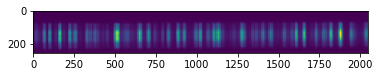

In [49]:
%run imaging_tool.py

exposure = 0.8* 1e2 # ms
vbin = 2

camera.setExposureTime(exposure)
camera.setVBin(vbin)
camera.setImageArea(10,0,2058,512//vbin)

for i in range(50):
    current = 0.1
    pwr.set_current(current)
 
    time.sleep(.5)
    camera.exposeFrame()
    time.sleep(.1)
    
    attributes = {
        "temperature": camera.getTemperature(),
        "device_status": camera.getDeviceStatus(),
        "exposure": exposure,
        "frame_type": "light",
        'voltage': pwr.get_voltage(),
        'current': pwr.get_current()
    }

    # load image
    image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
    # convert to xarray
    data = xr.DataArray(
        image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
    )
    filepath = 'test_{}_{}_{}_{}.nc'.format(current,exposure,vbin,i)
    filepath = join(r'\\10.249.254.51\Public\takeoka\Spectraacquisition_takeoka_20201015',filepath)
    data.to_netcdf(filepath)
    



imshow(image_data)

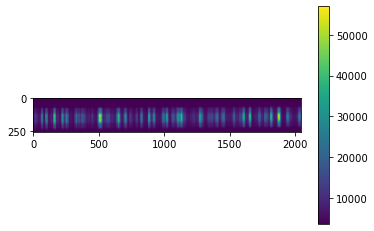

In [50]:
imshow(image_data)
colorbar()

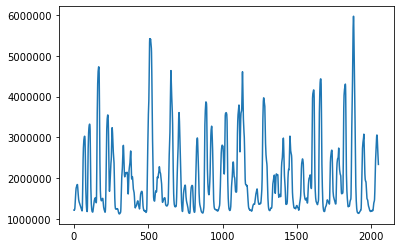

In [51]:
plot(np.sum(image_data, 0))

In [ ]:
for i in range(100):
    current = 0.08 if i%2 else 0.1
    pwr.set_current(current)
 
    time.sleep(.5)
    camera.exposeFrame()
    time.sleep(.1)
    
    attributes = {
        "temperature": camera.getTemperature(),
        "device_status": camera.getDeviceStatus(),
        "exposure": exposure,
        "frame_type": "light",
        'voltage': pwr.get_voltage(),
        'current': pwr.get_current()
    }

    # load image
    image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
    # convert to xarray
    data = xr.DataArray(
        image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
    )
    filepath = 'test_{}_{}.nc'.format(current,int(i/2))
    filepath = join(r'\\10.249.254.51\Public\takeoka\Spectraacquisition_takeoka_20201009',filepath)
    data.to_netcdf(filepath)
    



# Read from file

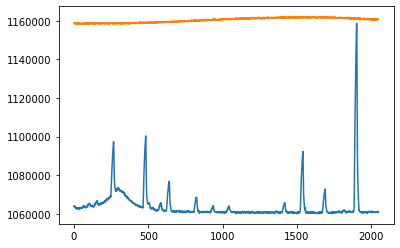

In [7]:
ds_disk = xr.open_dataset('cathode22A.nc')
a = ds_disk.to_array()
ds_disk.close()
plot(a[0].sum(axis=0))

ds_disk = xr.open_dataset('cathodebg.nc')
a = ds_disk.to_array()
ds_disk.close()
plot(a[0].sum(axis=0))

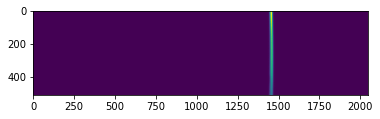

In [8]:
ds_disk = xr.open_dataset(filepath)
a = ds_disk.to_array()
ds_disk.close()
imshow(a[0])

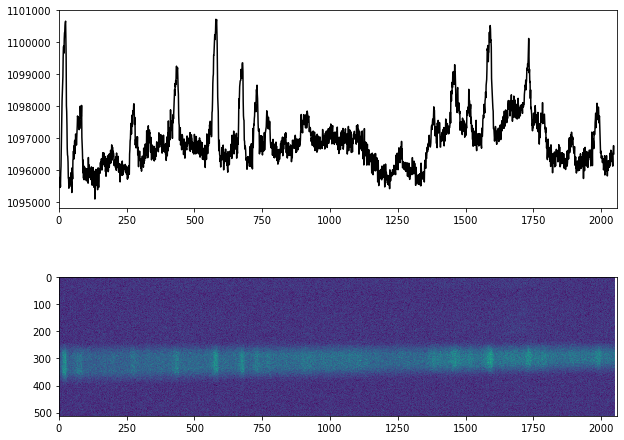

In [9]:
ds_disk = xr.open_dataset('test1.nc')
a = ds_disk.to_array()
ds_disk.close()
plot_image(a[0])

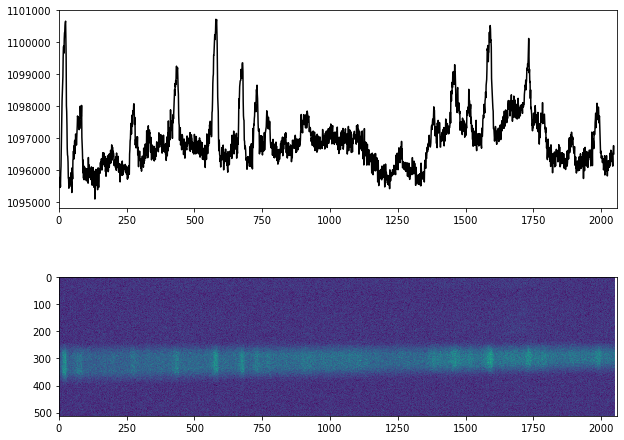

In [10]:
ds_disk = xr.open_dataset('test1.nc')
a = ds_disk.to_array()
ds_disk.close()
plot_image(a[0])

# Load and plot

In [11]:
import os
from os.path import join
%run imaging_tool.py


<Figure size 432x288 with 0 Axes>

In [12]:
basepath = r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20200826'
ls = os.listdir(basepath)

[(900, 1100), (900, 1100)]

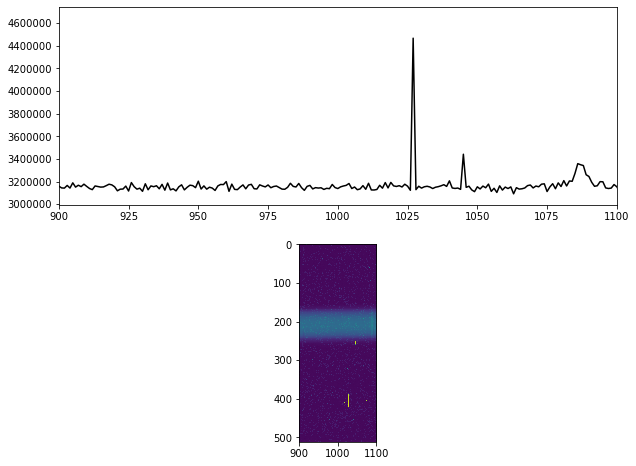

In [13]:
#### %run imaging_tool.py
i = 2
ls = sorted(os.listdir(basepath))
ls = [i for i in ls if 'Ar' in i]

f = ls[i]
fp = join(basepath, f)
data = xr.open_dataset(fp)
image_data = data.to_array()[0]
plot_image(image_data)
#[ax.axvline(1030,c='C3',ls='--') for ax in gcf().axes]
[ax.set_xlim(900,1100) for ax in gcf().axes]

(900, 1100)

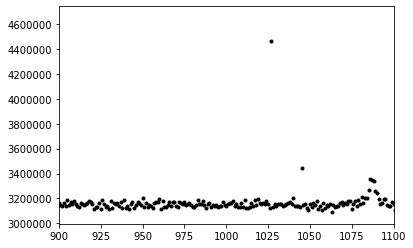

In [14]:
plot(image_data.sum(axis=0),'k.')
xlim(900,1100)